# <center> MACHINE LEARNING FINAL PROJECT  </center>
## <center> HOUSE RENT PREDICTION </center>
#### <center> AS A STUDENT OF UNIVERSITY OF NEW HAVEN, I WOULD LIKE TO PREDICT THE HOUSE RENT PRICE IN CONNECTICUT. THIS IS ONE OF THE MAJOR ISSUES THAT INTERNATIONAL STUDENTS FACE WHILE PREPARING THEIR TRAVEL TO THE USA. WHEN I WAS IN MY HOME COUNTRY, I WISHED THAT I COULD ESTIMATE THE LIVING PRICE GIVEN CERTAIN PERSONAL CHOICES. </center>


In [130]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from sklearn import model_selection
from sklearn import neighbors
from sklearn import preprocessing

# STEP 1: DATA CLEANING

In [131]:
#Loading entire data of USA and considering only Connecticut Data to analyse rent in Connecticut
data = pd.read_csv("/Users/Namithalu/Desktop/Machine Learning/housing_train.csv",nrows=70000)
ct_data_raw=data[data['state']=='ct']


In [132]:
#Removing extra variables
ct_data=ct_data_raw.drop(columns=["image_url",'description','lat','long','state','url','region','region_url'])
ct_data.shape

(3765, 14)

[Text(0, 0.5, 'After removing outliars')]

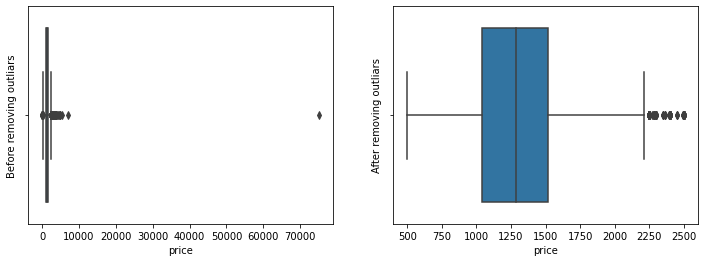

In [133]:
#visualizing price to check for outliars
fig, axs = pyplot.subplots(1,2,figsize=(12,4))
before=sns.boxplot(x=ct_data['price'],ax=axs[0])
before.set(ylabel='Before removing outliars')
#Removing outliars
ct_data=ct_data[ct_data['price']<=2500]
ct_data=ct_data[ct_data['price']>=500]
after=sns.boxplot(x=ct_data['price'],ax=axs[1])
after.set(ylabel='After removing outliars')

[Text(382.4363636363636, 0.5, 'After removing outliars')]

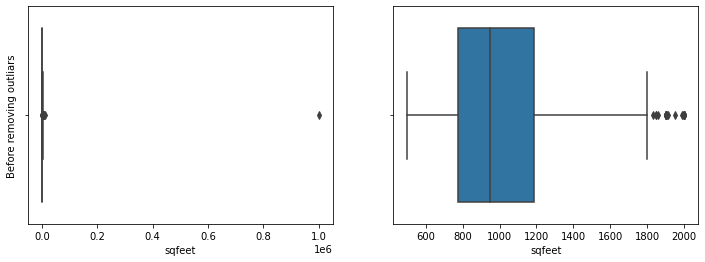

In [134]:
#visualizing sqfeet to check for outliars
fig, axs = pyplot.subplots(1,2,figsize=(12,4))
before=sns.boxplot(x=ct_data['sqfeet'],ax=axs[0])
before.set(ylabel='Before removing outliars')

#Removing outliars
ct_data=ct_data[ct_data['sqfeet']<=2000]
ct_data=ct_data[ct_data['sqfeet']>=500]
ax = sns.boxplot(x=ct_data['sqfeet'],ax=axs[1])
after.set(ylabel='After removing outliars')

<AxesSubplot:xlabel='baths', ylabel='count'>

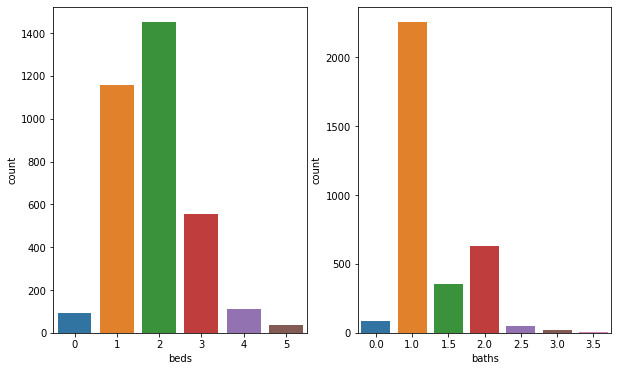

In [135]:
#Analizing other beds and baths for outliars
fig,axs = pyplot.subplots(1,2,figsize=(10,6))
sns.countplot(x="beds", data=ct_data,ax=axs[0])
sns.countplot(x="baths", data=ct_data,ax=axs[1])

In [136]:
# Checking if our data has NULL/NAN
print(ct_data.isnull().sum())

id                           0
price                        0
type                         0
sqfeet                       0
beds                         0
baths                        0
cats_allowed                 0
dogs_allowed                 0
smoking_allowed              0
wheelchair_access            0
electric_vehicle_charge      0
comes_furnished              0
laundry_options            640
parking_options            854
dtype: int64


#### We can remove the missing values of a categorical variable by one of the following options. We will use option 4
* Ignore the rows with missing data
* Replace by the mode 
* Treat it as another catergory
* Predict using another Classifier

In [156]:
#Building KNC to replace missing values for parking_options
le=preprocessing.LabelEncoder()
ct_data['encoded_type']=le.fit_transform(ct_data['type'])

train_x=ct_data[ct_data['parking_options'].notnull()]
train_x=train_x.drop(columns=['laundry_options','type'])
train_y=train_x['parking_options']
train_x=train_x.drop(columns=['parking_options'])

predict=ct_data[ct_data['parking_options'].isnull()]
predict=predict.drop(columns=['laundry_options','parking_options','type'])

KNC=neighbors.KNeighborsClassifier()
KNC.fit(train_x,train_y)
predicted=KNC.predict(predict)

predict['parking_options'] = predicted
train_x=ct_data[ct_data['parking_options'].notnull()]
df_with_no_nan_parking_predicted=pd.concat([train_x, predict], ignore_index=False)


In [138]:
#Building KNC to replace missing values for laundry_options
le=preprocessing.LabelEncoder()
ct_data['encoded_type']=le.fit_transform(ct_data['type'])

train_x=ct_data[ct_data['laundry_options'].notnull()]
train_x=train_x.drop(columns=['parking_options','type'])
train_y=train_x['laundry_options']
train_x=train_x.drop(columns=['laundry_options'])

predict=ct_data[ct_data['laundry_options'].isnull()]
predict=predict.drop(columns=['laundry_options','parking_options','type'])

KNC=neighbors.KNeighborsClassifier()
KNC.fit(train_x,train_y)
predicted=KNC.predict(predict)

predict['laundry_options'] = predicted
train_x=ct_data[ct_data['laundry_options'].notnull()]
df_with_no_nan_laundry_predicted=pd.concat([train_x, predict], ignore_index=False)


In [139]:
df_with_no_nan_parking_predicted['laundry_options']=df_with_no_nan_laundry_predicted['laundry_options']
cleaned_ct_data=df_with_no_nan_parking_predicted
cleaned_ct_data=cleaned_ct_data.drop(columns='type')
cleaned_ct_data.head()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,encoded_type
55782,7035742266,950,925,2,1.0,0,0,1,0,0,0,laundry on site,off-street parking,0
55819,7049223220,1656,513,0,1.0,1,1,0,0,0,0,laundry in bldg,no parking,0
55825,7049197143,1290,677,1,1.0,1,1,1,0,0,0,laundry in bldg,no parking,0
55860,7040141474,1150,775,1,1.0,1,1,1,0,0,0,laundry in bldg,off-street parking,0
55887,7046765731,1910,783,1,1.0,1,1,0,0,0,0,laundry in bldg,no parking,0


#### Now we do not have any missing values

In [140]:
print(cleaned_ct_data.isnull().sum())

id                         0
price                      0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
encoded_type               0
dtype: int64


# STEP 2: EXPLORATORY DATA ANALYSIS

In [141]:
#TRYING A FEW REGRESSION ALGORITHMS
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import *
import xgboost as xgb
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

To use <b> multiple regression or support vector machines </b> , there needs to be a linear relationship between 
* the dependent variable and each of your independent variables
* the dependent variable and the independent variables collectively

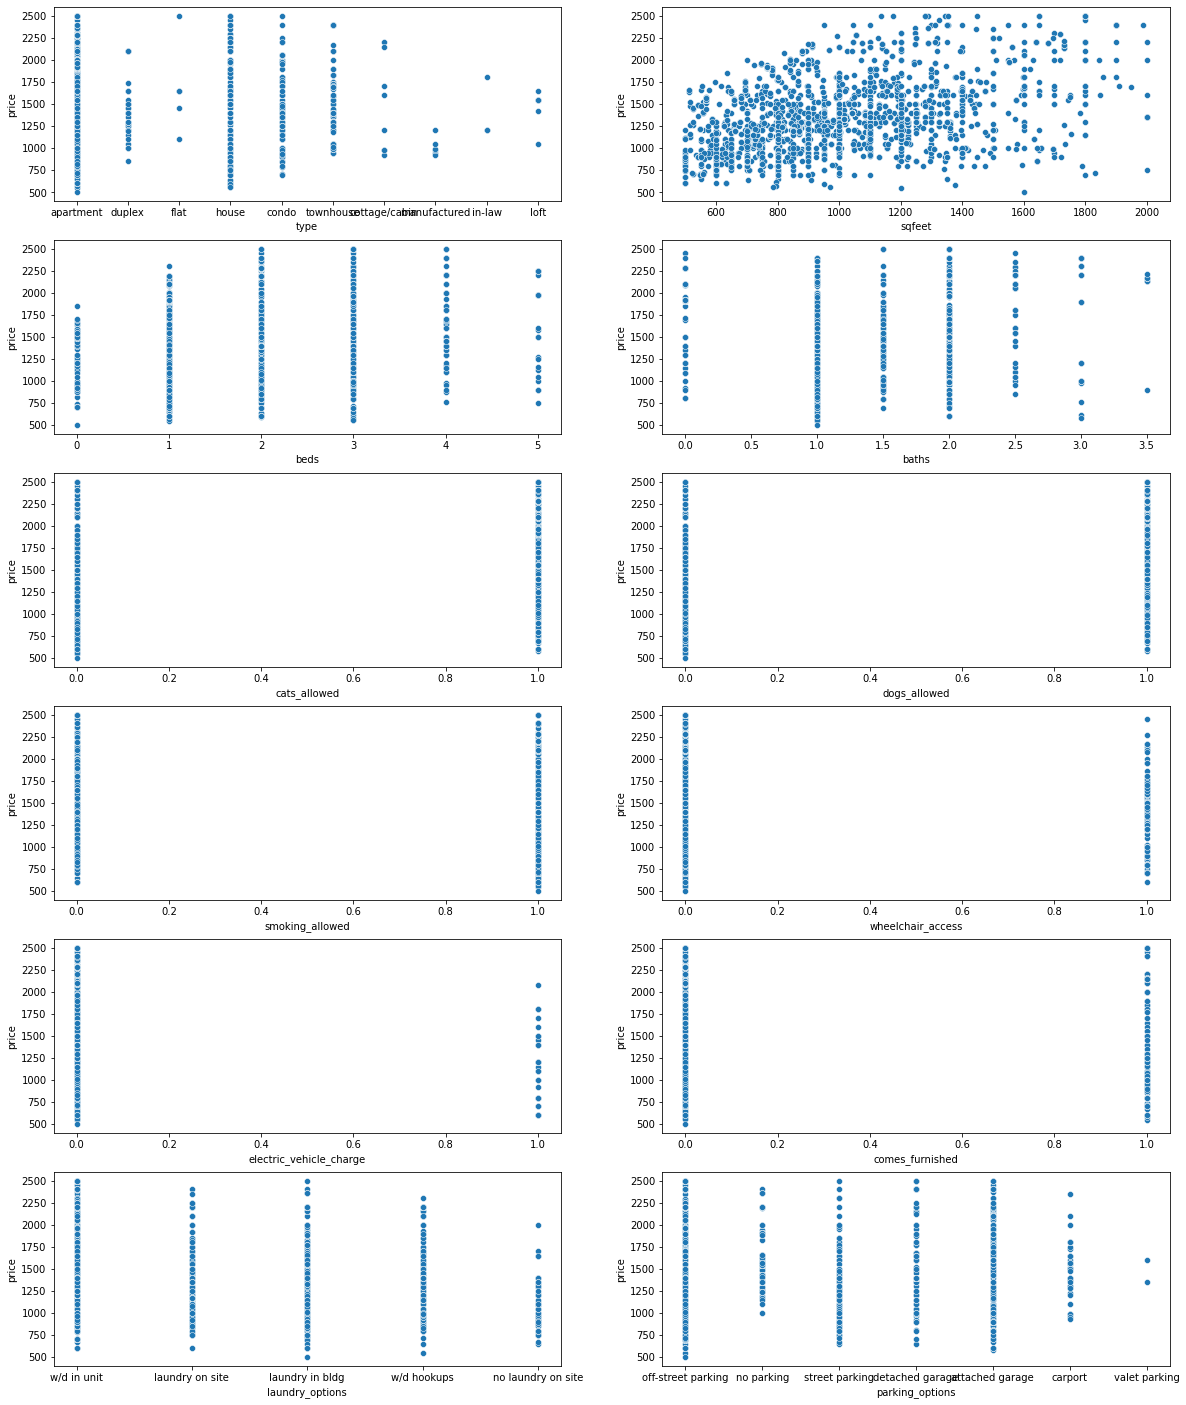

In [142]:
fig, axs = pyplot.subplots(6,2,figsize=(20,25))
variables=["type","sqfeet","beds","baths","cats_allowed","dogs_allowed","smoking_allowed","wheelchair_access",
           "electric_vehicle_charge","comes_furnished","laundry_options","parking_options"]
counter=-1
for i in range(0,6):
    for j in range(0,2):
        counter=counter+1
        sns.scatterplot(x=variables[counter], y="price", data=ct_data,ax=axs[i][j])

<AxesSubplot:>

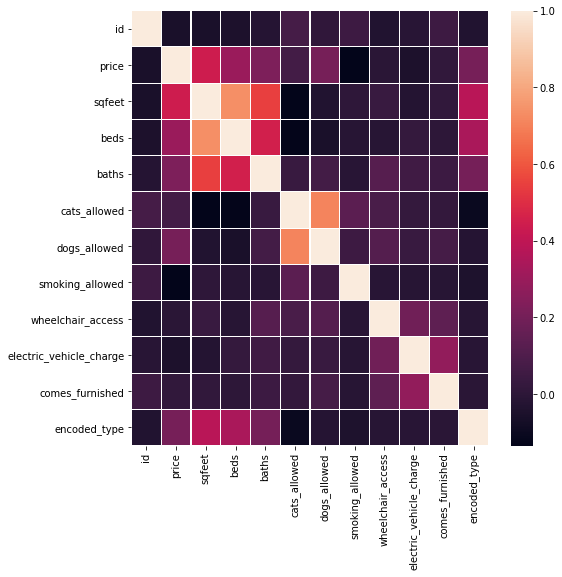

In [143]:
# CORRELATION MATRIX - to determine the dependance between multiple variables 
corr=cleaned_ct_data.corr()
fig,ax = plt.subplots(figsize =(8, 8))
sns.heatmap(corr,linewidths=0.1,vmax=1.0, linecolor='white',ax=ax,square=False)

### From about EDA, we can see that there is no evident linear relationship between the independent variables. So, we will be using Decison Trees or Ensemble methods of Decision Trees

##### SCALING 
* Scaling is applied when the magniture of two or more features must be made comparable 
* While calculating the distance, if the features are not scaled, features with high magnitudes will weigh in a lot more than the lesser magnitude ones while calculating the distance
* Since Decision Trees do not calculate Distance, Scaling is not required.

# STEP 3: MODEL SELECTION

In [144]:
DTR=DecisionTreeRegressor(random_state=5)
RFR = RandomForestRegressor(random_state=5)
ABR = AdaBoostRegressor(random_state=5)
BR = BaggingRegressor(random_state=5)
GBR = GradientBoostingRegressor(random_state=5)
XGB = xgb.XGBRegressor(random_state=5)

le=preprocessing.LabelEncoder()
cleaned_ct_data['laundry_options_encoded']=le.fit_transform(cleaned_ct_data['laundry_options'])
cleaned_ct_data['parking_options_encoded']=le.fit_transform(cleaned_ct_data['parking_options'])



In [145]:
dependent_variables=cleaned_ct_data.drop(columns=['price','id','laundry_options','parking_options'])
independent_variable=cleaned_ct_data['price']

X_train, X_test, y_train, y_test = model_selection.train_test_split(dependent_variables,independent_variable,
                                                                    test_size=0.25,random_state=5)



In [146]:
def error_function_mean_abs_percentage_error(X_train,y_train,X_test,y_test):
    y_true, y_pred = np.array(y_train), np.array(clf.predict(X_train))
    train=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    y_true, y_pred = np.array(y_test), np.array(clf.predict(X_test))
    test=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return train,test
    

In [147]:
df = pd.DataFrame(columns = ['Algorithm','Train Error','Test Error'])

for clf, label in zip([DTR,RFR,BR,ABR,GBR,XGB],['Decision Tree','Random Forest','Boostrap Aggregation','Ada Boosting','Gradient Boosting','Extreme gradiant boosting']):
    clf.fit(X_train, y_train)
    x=label
    train,test=error_function_mean_abs_percentage_error(X_train,y_train,X_test,y_test)
    df=df.append({'Algorithm':x,'Train Error':train,'Test Error':test},ignore_index=True)

df

,Algorithm,Train Error,Test Error
0,Decision Tree,1.765674,10.159285
1,Random Forest,4.622644,9.117373
2,Boostrap Aggregation,4.899082,9.546345
3,Ada Boosting,20.791031,20.213649
4,Gradient Boosting,13.153642,13.393528
5,Extreme gradiant boosting,4.559587,9.339084


## RESULTS:
* Metric used: <b> Mean absolute percentage error </b>
    
* Decision Tree Algorithm is overfitting
* Random forests and bootstrap aggtegation methods have reduced overfitting. <b> I will tune hyper parameters for Random Forests, Bootstrap aggregation and extreme gradient boosting </b>
* Ada boosting and Gradient boosting have high train and test errors. Hence I will not be using these.

<img src="overfit.png">

# STEP 3.1: Hyperparameter tuning for random forests

In [148]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

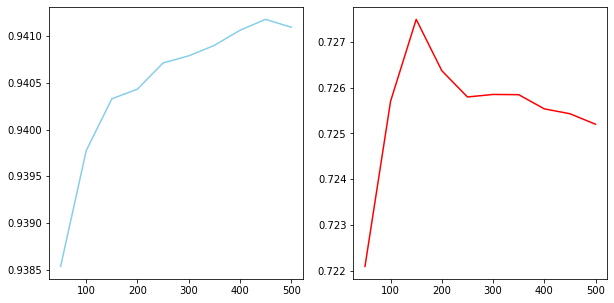

In [149]:
n_estimators = [50,100,150,200,250,300,350,400,450,500]
train=[]
test=[]
for estimator in n_estimators:
    RFR=RandomForestRegressor(n_estimators=estimator,random_state=5)
    RFR.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,RFR.predict(X_train)))
    test.append(metrics.r2_score(y_test,RFR.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(n_estimators,train,color='skyblue')
axs[1].plot(n_estimators,test,color='red')

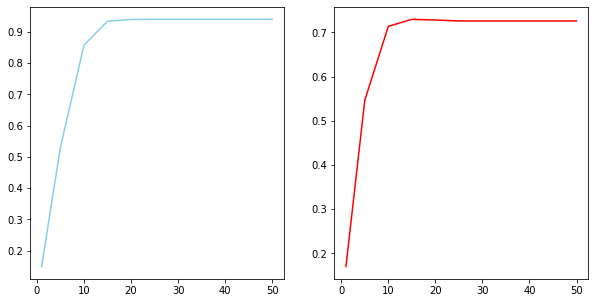

In [166]:
max_depth = [1,5,10,15,20,25,30,35,40,45,50]
train=[]
test=[]
for depth in max_depth:
    RFR=RandomForestRegressor(max_depth=depth,random_state=5)
    RFR.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,RFR.predict(X_train)))
    test.append(metrics.r2_score(y_test,RFR.predict(X_test)))

fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(max_depth,train,color='skyblue')
axs[1].plot(max_depth,test,color='red')

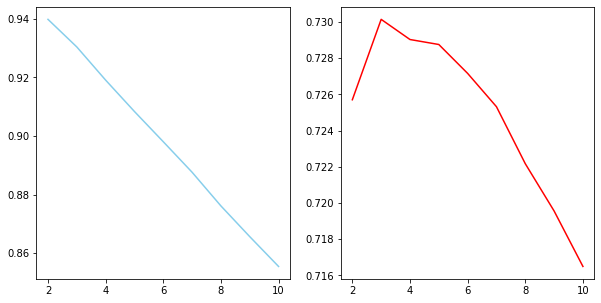

In [167]:
min_samples_split = [2,3,4,5,6,7,8,9,10]
train=[]
test=[]
for split in min_samples_split:
    RFR=RandomForestRegressor(min_samples_split=split,random_state=5)
    RFR.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,RFR.predict(X_train)))
    test.append(metrics.r2_score(y_test,RFR.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(min_samples_split,train,color='skyblue')
axs[1].plot(min_samples_split,test,color='red')

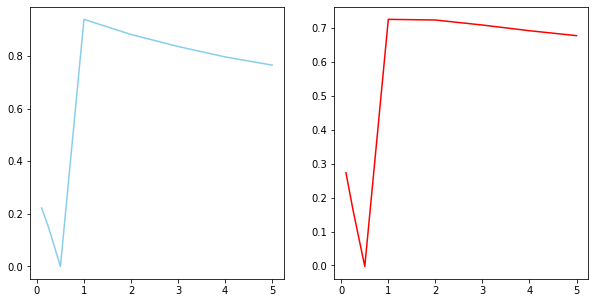

In [168]:
min_samples_leaf = [0.1,0.25,0.5,1,2,3,4,5]
train=[]
test=[]
for leaf in min_samples_leaf:
    RFR=RandomForestRegressor(min_samples_leaf=leaf,random_state=5)
    RFR.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,RFR.predict(X_train)))
    test.append(metrics.r2_score(y_test,RFR.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(min_samples_leaf,train,color='skyblue')
axs[1].plot(min_samples_leaf,test,color='red')

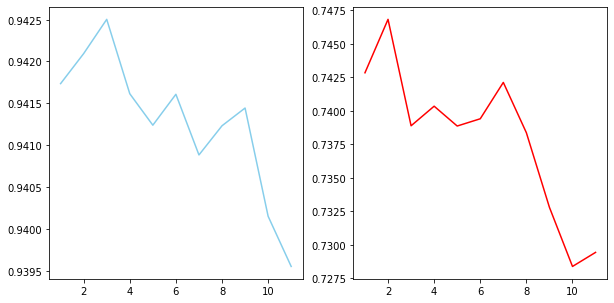

In [169]:
max_features = list(range(1,X_train.shape[1]))
train=[]
test=[]
for features in max_features:
    RFR=RandomForestRegressor(max_features=features,random_state=5)
    RFR.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,RFR.predict(X_train)))
    test.append(metrics.r2_score(y_test,RFR.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(max_features,train,color='skyblue')
axs[1].plot(max_features,test,color='red')

In [170]:
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 300, num = 10)]
max_features = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [150, 166, 183, 200, 216, 233, 250, 266, 283, 300]}


In [155]:
rf = RandomForestRegressor(random_state=5)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv =4,random_state=42)
rf_random.fit(X_train,y_train)
rf_random.best_params_

{'n_estimators': 183,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 6,
 'max_depth': 18}

### Before tuning the parameters

In [171]:
RFR=RandomForestRegressor(random_state=5)
RFR.fit(X_train,y_train)
print("Test r2 score: ",metrics.r2_score(y_test,RFR.predict(X_test)))
print("Train r2 score: ", metrics.r2_score(y_train,RFR.predict(X_train)))

Test r2 score:  0.725701609757172
Train r2 score:  0.9397748925149937


### After tuning the parameters

In [172]:
RFR=RandomForestRegressor(random_state=5,oob_score = True,n_estimators=183,max_depth=18,min_samples_split=3,min_samples_leaf=1,max_features=6,bootstrap=True)
RFR.fit(X_train,y_train)
print("Test r2 score: ",metrics.r2_score(y_test,RFR.predict(X_test)))
print("Train r2 score: ", metrics.r2_score(y_train,RFR.predict(X_train)))

Test r2 score:  0.7438392019796223
Train r2 score:  0.9265848778281451


<AxesSubplot:xlabel='name', ylabel='imp'>

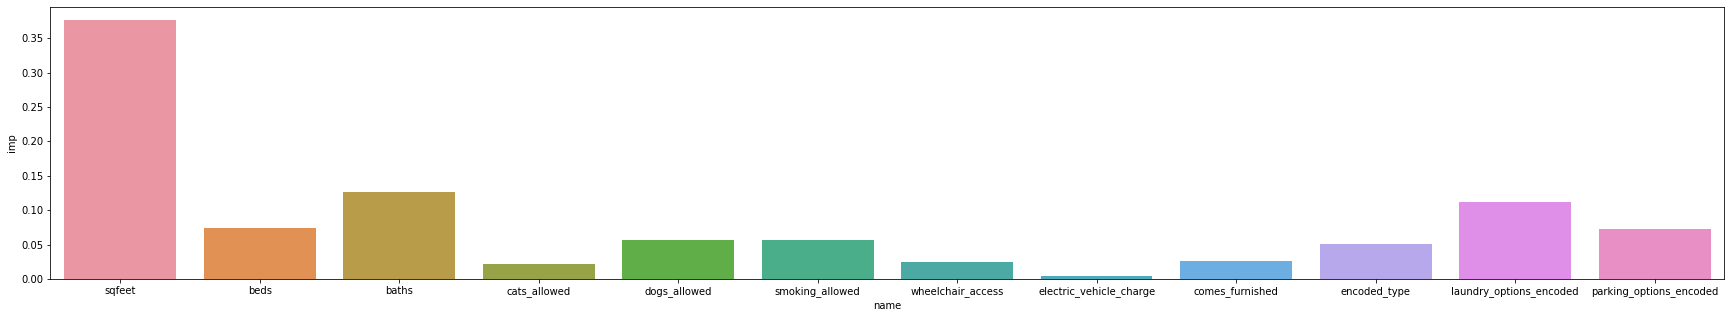

In [173]:
# Analysing feature importances
importances = list(RFR.feature_importances_)
feature_list = list(dependent_variables.columns)
importance_df=pd.DataFrame(list(zip(feature_list, importances)),columns=["name","imp"])
fig, axs = pyplot.subplots(1,1,figsize=(30,5))
sns.barplot(x=importance_df['name'],y=importance_df['imp'],data=importance_df)

In [174]:
# Plotting 1st decision tree
#from dtreeviz.trees import dtreeviz
#from sklearn import tree
#plt.figure(figsize=(20,20))
#_ = tree.plot_tree(RFR.estimators_[0], feature_names=dependent_variables.columns, filled=True)

# STEP 3.1: Hyperparameter tuning for bagging regressor

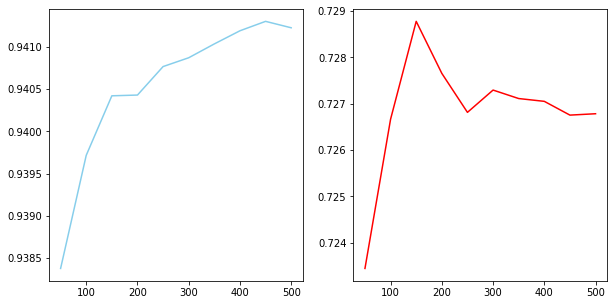

In [175]:
n_estimators = [50,100,150,200,250,300,350,400,450,500]
train=[]
test=[]
for estimator in n_estimators:
    BR=BaggingRegressor(n_estimators=estimator,random_state=5)
    BR.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,BR.predict(X_train)))
    test.append(metrics.r2_score(y_test,BR.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(n_estimators,train,color='skyblue')
axs[1].plot(n_estimators,test,color='red')

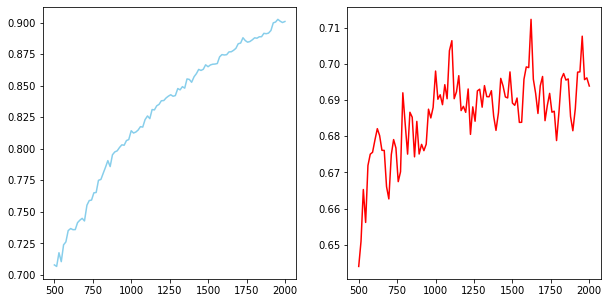

In [176]:
max_samples = [int(x) for x in np.linspace(start = 500, stop = 2000, num =100)]
train=[]
test=[]
for samples in max_samples:
    BR=BaggingRegressor(max_samples=samples,random_state=5)
    BR.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,BR.predict(X_train)))
    test.append(metrics.r2_score(y_test,BR.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(max_samples,train,color='skyblue')
axs[1].plot(max_samples,test,color='red')

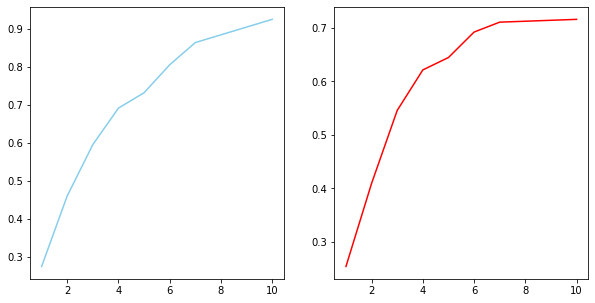

In [177]:
max_features = [1,2,3,4,5,6,7,10]
train=[]
test=[]
for features in max_features:
    BR=BaggingRegressor(max_features=features,random_state=5)
    BR.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,BR.predict(X_train)))
    test.append(metrics.r2_score(y_test,BR.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(max_features,train,color='skyblue')
axs[1].plot(max_features,test,color='red')

In [178]:
base_estimator= [None, RandomForestRegressor()]
n_estimators= [int(x) for x in np.linspace(start = 1, stop = 200, num =200)]
max_samples=[int(x) for x in np.linspace(start = 500, stop = 2000, num =100)]
max_features= [1,2,3,4,5,6,7,10]
bootstrap= [True, False]
bootstrap_features= [True, False]
              

random_grid = {'base_estimator':base_estimator,
          'n_estimators':n_estimators,
          'max_samples':max_samples,
          'max_features': max_features,
          'bootstrap': bootstrap,
          'bootstrap_features': bootstrap_features}

In [116]:
BR=BaggingRegressor(random_state=5)
BR_random = RandomizedSearchCV(estimator = BR, param_distributions = random_grid, n_iter = 10, cv =4,random_state=5)
BR_random.fit(X_train,y_train)
BR_random.best_params_

{'n_estimators': 113,
 'max_samples': 1635,
 'max_features': 5,
 'bootstrap_features': False,
 'bootstrap': False,
 'base_estimator': None}

#### Before hyperparameter tuning

In [179]:
BR=BaggingRegressor(random_state=5)
BR.fit(X_train,y_train)
print("Test r2 score: ",metrics.r2_score(y_test,BR.predict(X_test)))
print("Train r2 score: ", metrics.r2_score(y_train,BR.predict(X_train)))


Test r2 score:  0.7033042241377641
Train r2 score:  0.9275820697227717


#### After hyperparameter tuning

In [180]:
BR=BaggingRegressor(random_state=5,n_estimators= 113,max_samples= 1635,max_features=5,
                    bootstrap_features= False,bootstrap= False,base_estimator= None)
BR.fit(X_train,y_train)
print("Test r2 score: ",metrics.r2_score(y_test,BR.predict(X_test)))
print("Train r2 score: ", metrics.r2_score(y_train,BR.predict(X_train)))

Test r2 score:  0.646737808983582
Train r2 score:  0.7350763150178412


# STEP 3.1: Hyperparameter tuning for xgboost

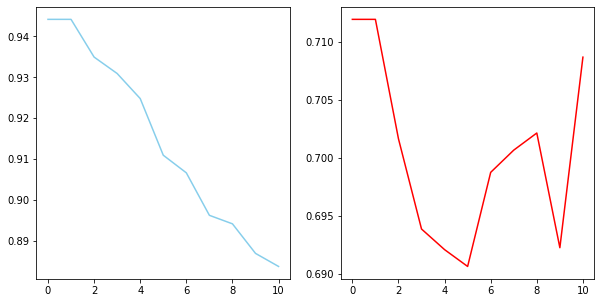

In [185]:
min_child_weight = [0,0.25,0.5,0.75,1,2,3,4,5,6,7,8,9,10]
train=[]
test=[]
for weight in min_child_weight:
    x=xgb.XGBRegressor(min_child_weight=weight,random_state=5)
    x.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,x.predict(X_train)))
    test.append(metrics.r2_score(y_test,x.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(min_child_weight,train,color='skyblue')
axs[1].plot(min_child_weight,test,color='red')

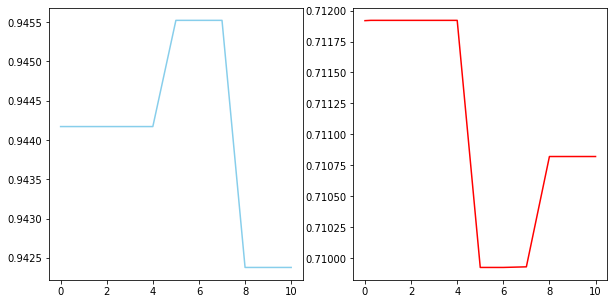

In [186]:
gamma = [0,0.25,0.5,0.75,1,2,3,4,5,6,7,8,9,10]
train=[]
test=[]
for i in gamma:
    x=xgb.XGBRegressor(gamma=i,random_state=5)
    x.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,x.predict(X_train)))
    test.append(metrics.r2_score(y_test,x.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(gamma,train,color='skyblue')
axs[1].plot(gamma,test,color='red')

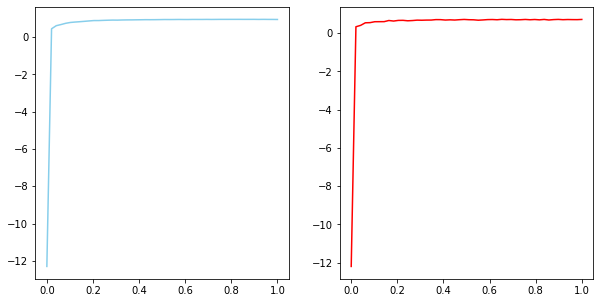

In [189]:
subsample = [x for x in np.linspace(start = 0, stop = 1, num =50)]
train=[]
test=[]
for sample in subsample:
    x=xgb.XGBRegressor(subsample=sample,random_state=5)
    x.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,x.predict(X_train)))
    test.append(metrics.r2_score(y_test,x.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(subsample,train,color='skyblue')
axs[1].plot(subsample,test,color='red')

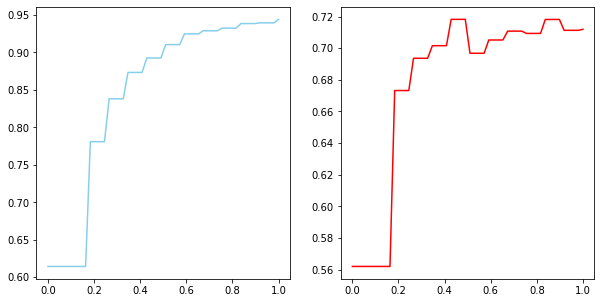

In [191]:
colsample_bytree = [x for x in np.linspace(start = 0, stop = 1, num =50)]
train=[]
test=[]
for sample in colsample_bytree:
    x=xgb.XGBRegressor(colsample_bytree=sample,random_state=5)
    x.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,x.predict(X_train)))
    test.append(metrics.r2_score(y_test,x.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(colsample_bytree,train,color='skyblue')
axs[1].plot(colsample_bytree,test,color='red')

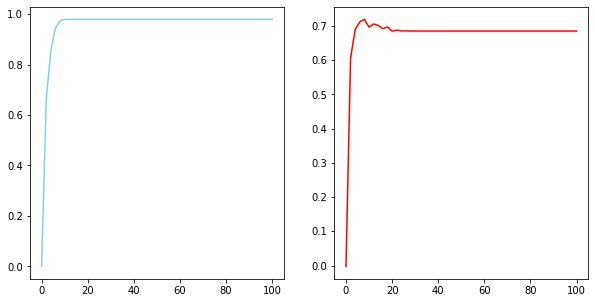

In [196]:
max_depth = [int(x) for x in np.linspace(start = 0, stop = 100, num =50)]
train=[]
test=[]
for depth in max_depth:
    x=xgb.XGBRegressor(max_depth=depth,random_state=5)
    x.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,x.predict(X_train)))
    test.append(metrics.r2_score(y_test,x.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(max_depth,train,color='skyblue')
axs[1].plot(max_depth,test,color='red')

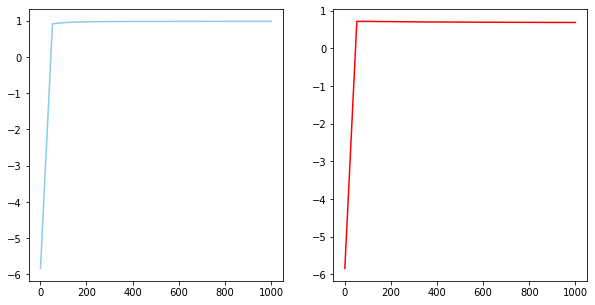

In [205]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num =20)]
train=[]
test=[]
for n in n_estimators:
    x=xgb.XGBRegressor(n_estimators=n,random_state=5)
    x.fit(X_train,y_train)
    train.append(metrics.r2_score(y_train,x.predict(X_train)))
    test.append(metrics.r2_score(y_test,x.predict(X_test)))
    
fig, axs = pyplot.subplots(1,2,figsize=(10,5))
axs[0].plot(n_estimators,train,color='skyblue')
axs[1].plot(n_estimators,test,color='red')

In [206]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num =50)]
min_child_weight=[0,0.25,0.5,0.75,1,2,3,4,5,6,7,8,9,10]
gamma=[0,0.25,0.5,0.75,1,2,3,4,5,6,7,8,9,10]
subsample=[x for x in np.linspace(start = 0, stop = 1, num =50)]
colsample_bytree=[x for x in np.linspace(start = 0, stop = 1, num =50)]
max_depth=[int(x) for x in np.linspace(start = 0, stop = 100, num =50)]

random_grid = {
        'n_estimators':n_estimators,
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'max_depth': max_depth
        }

x=xgb.XGBRegressor(random_state=5)
x = RandomizedSearchCV(estimator = x, param_distributions = random_grid, n_iter = 10, cv =4,random_state=5)
x.fit(X_train,y_train)
x.best_params_

{'subsample': 1.0,
 'n_estimators': 78,
 'min_child_weight': 5,
 'max_depth': 81,
 'gamma': 0.5,
 'colsample_bytree': 0.5306122448979591}

#### before hyper parameter tuning

In [207]:
x=xgb.XGBRegressor(random_state=5)
x.fit(X_train,y_train)
print("Test r2 score: ",metrics.r2_score(y_test,x.predict(X_test)))
print("Train r2 score: ", metrics.r2_score(y_train,x.predict(X_train)))

Test r2 score:  0.7119190753337252
Train r2 score:  0.9441710686275391


#### after hyper parameter tuning

In [208]:
x=xgb.XGBRegressor(random_state=5,n_estimators=78,subsample= 1,min_child_weight= 5,max_depth= 81,gamma= 0.5,colsample_bytree=  0.53)
x.fit(X_train,y_train)
print("Test r2 score: ",metrics.r2_score(y_test,x.predict(X_test)))
print("Train r2 score: ", metrics.r2_score(y_train,x.predict(X_train)))

Test r2 score:  0.7268790324483652
Train r2 score:  0.9628019464959395


# STEP 5: PREDICTING

In [209]:
# Seeing the label encoding for each category
# FOR TYPE 
print("Label values for TYPE of the house: ")
print(ct_data.groupby(['type']).first()['encoded_type'],"\n")

# FOR laundry_options 
print("Label values for laundry: ")
print(cleaned_ct_data.groupby(['laundry_options']).first()['laundry_options_encoded'],"\n")

# FOR parking_options 
print("Label values for parking: ")
print(cleaned_ct_data.groupby(['parking_options']).first()['parking_options_encoded'],"\n")

Label values for TYPE of the house: 
type
apartment        0
condo            1
cottage/cabin    2
duplex           3
flat             4
house            5
in-law           6
loft             7
manufactured     8
townhouse        9
Name: encoded_type, dtype: int64 

Label values for laundry: 
laundry_options
laundry in bldg       0
laundry on site       1
no laundry on site    2
w/d hookups           3
w/d in unit           4
Name: laundry_options_encoded, dtype: int64 

Label values for parking: 
parking_options
attached garage       0
carport               1
detached garage       2
no parking            3
off-street parking    4
street parking        5
valet parking         6
Name: parking_options_encoded, dtype: int64 



In [225]:
import pyinputplus as pyip

In [228]:
input_type=pyip.inputNum('Refer above table and input Type of apartment: ', min=0, lessThan=10)

Refer above table and input Type of apartment: 4


In [229]:
input_sqfeet=pyip.inputNum("Enter 500 to 2000: ", min=500,lessThan = 2000) 

Enter 500 to 2000: 1000


In [214]:
input_beds=pyip.inputNum("Enter number of beds: ", min=1,lessThan = 6)                                      

Enter number of beds: 2


In [215]:
input_baths=pyip.inputNum("Enter number of baths: ", min=1,lessThan = 4)                       


Enter number of baths: 1


In [216]:
input_cats_allowed=pyip.inputNum("Enter 0 for NO or 1 for Yes: ", min=0,lessThan = 2) 


Enter 0 for NO or 1 for Yes: 0


In [217]:
input_dogs_allowed=pyip.inputNum("Enter 0 for NO or 1 for Yes: ", min=0,lessThan = 2)


Enter 0 for NO or 1 for Yes: 1


In [218]:
input_smoking_allowed=pyip.inputNum("Enter 0 for NO or 1 for Yes: ", min=0,lessThan = 2)


Enter 0 for NO or 1 for Yes: 0


In [219]:
input_wheelchair_access=pyip.inputNum("Enter 0 for NO or 1 for Yes: ", min=0,lessThan = 2)


Enter 0 for NO or 1 for Yes: 1


In [220]:
input_electric_vehicle_charge=pyip.inputNum("Enter 0 for NO or 1 for Yes: ", min=0,lessThan = 2)


Enter 0 for NO or 1 for Yes: 0


In [221]:
input_comes_furnished=pyip.inputNum("Enter 0 for NO or 1 for Yes: ", min=0,lessThan = 2)

Enter 0 for NO or 1 for Yes: 0


In [222]:
input_laundry_options=pyip.inputNum("Enter 0 for NO or 1 for Yes: ", min=0,lessThan = 2)

Enter 0 for NO or 1 for Yes: 1


In [223]:
input_parking_options=pyip.inputNum("Enter 0 for NO or 1 for Yes: ", min=0,lessThan = 2)

Enter 0 for NO or 1 for Yes: 1


In [230]:
my_inputs=np.array([input_type,input_sqfeet,input_beds,input_baths,input_cats_allowed,input_dogs_allowed,input_smoking_allowed,input_wheelchair_access,input_electric_vehicle_charge,input_comes_furnished,input_laundry_options,input_parking_options])
print("My inputs: ",my_inputs)
RFR=RandomForestRegressor(random_state=5,oob_score = True,n_estimators=183,max_depth=18,min_samples_split=3,min_samples_leaf=1,max_features=6,bootstrap=True)
RFR.fit(X_train,y_train)
predicted_rent=RFR.predict(my_inputs.reshape(1, -1))
print("PREDICTED RENT AMOUNT IS: ", predicted_rent)

My inputs:  [   4 1000    2    1    0    1    0    1    0    0    1    1]
PREDICTED RENT AMOUNT IS:  [1047.62737445]
